In [197]:
pip freeze > visualisation_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [198]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tensorflow.keras.utils import to_categorical

In [199]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [200]:
data_df = pd.read_csv("Project_data_csv")

In [201]:
data_df.shape

(277819, 31)

In [202]:
data_df.head()

,Unnamed: 0,batting_team,bowling_team,innings_num,over_col,ball_col,Match ID,Start Date,Runs,Running Total,...,Over and Balls Total,Remaining Team Value,Remaining Average Team Value,Start Team Value,DL %,Tie Score,Ground RPO,Ground RPW,Batting Team Result DL,DL Correct?
0,0,Pakistan,Australia,2,20,1,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.6,103,4.79,29.31,Australia,Yes
1,1,Pakistan,Australia,2,20,2,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.8,103,4.79,29.31,Australia,Yes
2,2,Pakistan,Australia,2,20,3,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.9,104,4.79,29.31,Australia,Yes
3,3,Pakistan,Australia,2,20,4,1000887,2017-01-13,0,91,...,55,16,2.0,24,39.1,104,4.79,29.31,Australia,Yes
4,4,Pakistan,Australia,2,20,5,1000887,2017-01-13,1,92,...,55,16,2.0,24,39.3,105,4.79,29.31,Australia,Yes


In [203]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277819 entries, 0 to 277818
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    277819 non-null  int64  
 1   batting_team                  277819 non-null  object 
 2   bowling_team                  277819 non-null  object 
 3   innings_num                   277819 non-null  int64  
 4   over_col                      277819 non-null  int64  
 5   ball_col                      277819 non-null  int64  
 6   Match ID                      277819 non-null  int64  
 7   Start Date                    277819 non-null  object 
 8   Runs                          277819 non-null  int64  
 9   Running Total                 277819 non-null  int64  
 10  Batter out                    277819 non-null  object 
 11  Wickets taken                 277819 non-null  int64  
 12  Start Team                    277819 non-nul

In [204]:
data_df['DL Correct?'].value_counts()

DL Correct?
Yes    231485
No      46334
Name: count, dtype: int64

In [205]:
DL_accuracy=225310/(225310+44913)

In [206]:
DL_accuracy

0.833792830366031

In [207]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277819 entries, 0 to 277818
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    277819 non-null  int64  
 1   batting_team                  277819 non-null  object 
 2   bowling_team                  277819 non-null  object 
 3   innings_num                   277819 non-null  int64  
 4   over_col                      277819 non-null  int64  
 5   ball_col                      277819 non-null  int64  
 6   Match ID                      277819 non-null  int64  
 7   Start Date                    277819 non-null  object 
 8   Runs                          277819 non-null  int64  
 9   Running Total                 277819 non-null  int64  
 10  Batter out                    277819 non-null  object 
 11  Wickets taken                 277819 non-null  int64  
 12  Start Team                    277819 non-nul

Below - creating a column for who wins - team 1 (team who bowled second), team 2(team who batted second) or a tie.  Can define these as bowling team and batting team respectively because I'm only using second innings data.

Find justification for using -1,0 and 1 rather than 1,2,3

In [208]:
#Wanted to choose -1, 0 and 1 but couldn't because sparse categorical entropy won't take -ve value
winner_no = []
winner_name = []

for index, row in data_df.iterrows():
    #Team 2 wins
    if row['Winner'] == row['batting_team']:
        winner_no.append(2)
        winner_name.append("Team 2")

    #Team 1 wins
    elif row['Winner'] == row['bowling_team']:
        winner_no.append(0)
        winner_name.append("Team 1")

    #Tie
    else:
       winner_no.append(1)
       winner_name.append("Tie")

In [209]:
winner_name_df = pd.DataFrame(winner_name, columns=['Winner'])
winner_no_df = pd.DataFrame(winner_no, columns=['Winner_num'])

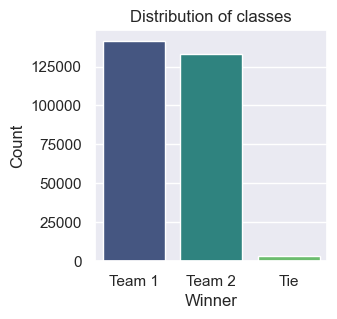

In [210]:
#sns.set(style="whitegrid")
plt.figure(figsize=(3, 3))
sns.countplot(x='Winner', data=winner_name_df, palette='viridis')

# Adding labels and title
plt.ylabel('Count')
plt.title('Distribution of classes')
plt.show()


In [211]:
!pip install tabulate
from tabulate import tabulate

In [212]:
winner_name_df.value_counts(normalize=True)

Winner
Team 1    0.508327
Team 2    0.479146
Tie       0.012526
Name: proportion, dtype: float64

In [213]:
team = ['Team 1', 'Team 2', 'Tie']
win_per =[]
for w in winner_name_df.value_counts(normalize=True): win_per.append(w)

win_per_df = pd.DataFrame(list(zip(team, win_per)), columns =['Winner', 'Percentage'])

print(tabulate(win_per_df, headers='keys', tablefmt='psql'))


+----+----------+--------------+
|    | Winner   |   Percentage |
|----+----------+--------------|
|  0 | Team 1   |    0.508327  |
|  1 | Team 2   |    0.479146  |
|  2 | Tie      |    0.0125261 |
+----+----------+--------------+


Showed that it's slightly favourable to have batted first in the data I have

In [214]:
dl_winner_name = []
dl_winner_no = []
for index, row in data_df.iterrows():
    #Team 2 wins according to DL
    if row['Batting Team Result DL'] == row['batting_team']:
        dl_winner_no.append(2)
        dl_winner_name.append("Team 2")


    #Team 1 wins according to DL
    elif row['Batting Team Result DL'] == row['bowling_team']:
        dl_winner_name.append("Team 1")
        dl_winner_no.append(0)

    #Tie
    else:
       dl_winner_name.append("Tie")
       dl_winner_no.append(1)


dl_winner_name_df = pd.DataFrame(dl_winner_name, columns=['DL Winner'])
dl_winner_no_df =pd.DataFrame(dl_winner_no, columns=['DL Winner_num'])

In [215]:
team = ['Team 1', 'Team 2', 'Tie']
dl_win_per =[]
for dlw in dl_winner_name_df.value_counts(normalize=True): dl_win_per.append(dlw)

dl_win_per_df = pd.DataFrame(list(zip(team, dl_win_per)), columns =['DL Winner', 'Percentage'])

print(tabulate(dl_win_per_df, headers='keys', tablefmt='psql'))

+----+-------------+--------------+
|    | DL Winner   |   Percentage |
|----+-------------+--------------|
|  0 | Team 1      |   0.499714   |
|  1 | Team 2      |   0.49046    |
|  2 | Tie         |   0.00982654 |
+----+-------------+--------------+


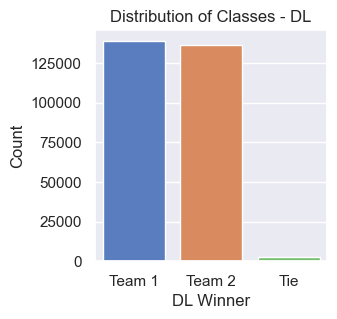

In [216]:
#sns.set(style="whitegrid")
plt.figure(figsize=[3, 3])
sns.countplot(x='DL Winner', data=dl_winner_name_df, palette='muted')

# Adding labels and title
plt.ylabel('Count')
plt.title('Distribution of Classes - DL')
plt.show()


In [217]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

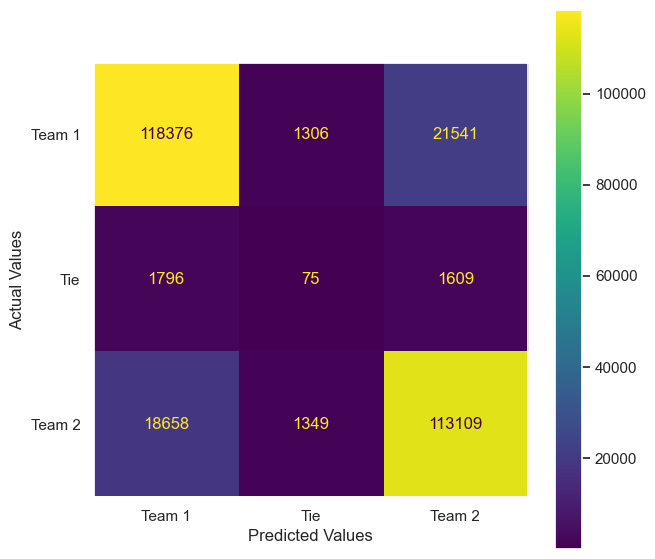

              precision    recall  f1-score   support

      Team 1       0.85      0.84      0.85    141223
         Tie       0.03      0.02      0.02      3480
      Team 2       0.83      0.85      0.84    133116

    accuracy                           0.83    277819
   macro avg       0.57      0.57      0.57    277819
weighted avg       0.83      0.83      0.83    277819



In [218]:
#SORT OUT SIZE OF CMD
from matplotlib.pyplot import figure

labels= ['Team 1', 'Tie', 'Team 2']
cm = confusion_matrix(winner_no_df['Winner_num'], dl_winner_no_df['DL Winner_num'])
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
#cmd.plot()
plt.grid(None)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(winner_no_df['Winner_num'], dl_winner_no_df['DL Winner_num'], target_names=labels))

Under DL it's more likely that Team 1 will be misclassified as Team 2 than Team 2 is misclassified as Team 1.

In [219]:
winner_no_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277819 entries, 0 to 277818
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Winner_num  277819 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


Turning the Team 1 win, Team 2 win and tie numbers into 3 categories (1,2,3 respectively)

In [220]:
#winner_no_df['Winner_num'] = winner_no_df.Winner_num.astype('category')


In [221]:
data_df['Winner_num'] = winner_no_df['Winner_num']

In [222]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277819 entries, 0 to 277818
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    277819 non-null  int64  
 1   batting_team                  277819 non-null  object 
 2   bowling_team                  277819 non-null  object 
 3   innings_num                   277819 non-null  int64  
 4   over_col                      277819 non-null  int64  
 5   ball_col                      277819 non-null  int64  
 6   Match ID                      277819 non-null  int64  
 7   Start Date                    277819 non-null  object 
 8   Runs                          277819 non-null  int64  
 9   Running Total                 277819 non-null  int64  
 10  Batter out                    277819 non-null  object 
 11  Wickets taken                 277819 non-null  int64  
 12  Start Team                    277819 non-nul

Chose numerical values that feed into my hypothesis (wickets taken, team value, ground scores and remainder feed into the prediction.)  Changed Winner into a numerical field for prediction as this will be the target variable.

In [223]:
data_df = data_df[['Unnamed: 0', 'Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Winner_num', 'Remainder']]

In [224]:
data_df.rename(columns={'Unnamed: 0': 'Row ID'}, inplace=True)

In [225]:
data_df

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remainder
0,0,3,16,2.000,24,4.79,29.31,0,29.5
1,1,3,16,2.000,24,4.79,29.31,0,29.4
2,2,3,16,2.000,24,4.79,29.31,0,29.3
3,3,3,16,2.000,24,4.79,29.31,0,29.2
4,4,3,16,2.000,24,4.79,29.31,0,29.1
...,...,...,...,...,...,...,...,...,...
277814,277814,3,13,1.625,21,5.40,31.64,2,3.0
277815,277815,3,13,1.625,21,5.40,31.64,2,2.5
277816,277816,3,13,1.625,21,5.40,31.64,2,2.4
277817,277817,3,13,1.625,21,5.40,31.64,2,2.3


In [226]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277819 entries, 0 to 277818
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        277819 non-null  int64  
 1   Wickets taken                 277819 non-null  int64  
 2   Remaining Team Value          277819 non-null  int64  
 3   Remaining Average Team Value  277819 non-null  float64
 4   Start Team Value              277819 non-null  int64  
 5   Ground RPO                    277819 non-null  float64
 6   Ground RPW                    277819 non-null  float64
 7   Winner_num                    277819 non-null  int64  
 8   Remainder                     277819 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 19.1 MB


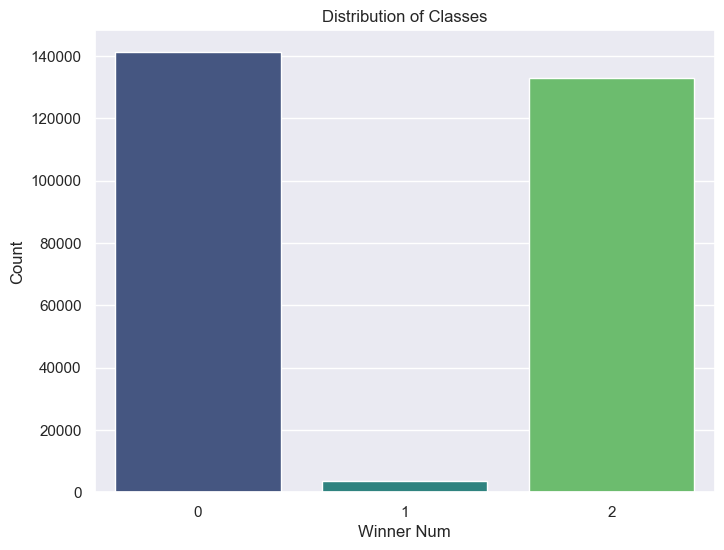

In [227]:
#sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Winner_num', data=data_df, palette='viridis')

# Adding labels and title
plt.xlabel('Winner Num')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()


In [228]:
data_df

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remainder
0,0,3,16,2.000,24,4.79,29.31,0,29.5
1,1,3,16,2.000,24,4.79,29.31,0,29.4
2,2,3,16,2.000,24,4.79,29.31,0,29.3
3,3,3,16,2.000,24,4.79,29.31,0,29.2
4,4,3,16,2.000,24,4.79,29.31,0,29.1
...,...,...,...,...,...,...,...,...,...
277814,277814,3,13,1.625,21,5.40,31.64,2,3.0
277815,277815,3,13,1.625,21,5.40,31.64,2,2.5
277816,277816,3,13,1.625,21,5.40,31.64,2,2.4
277817,277817,3,13,1.625,21,5.40,31.64,2,2.3


In [229]:
data_df.describe()

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remainder
count,277819.000000,277819.000000,277819.000000,277819.000000,277819.000000,277819.000000,277819.000000,277819.000000,277819.000000
mean,138909.000000,4.347428,12.605344,1.814175,24.129368,4.941863,30.340351,0.970819,17.309806
std,80199.581555,2.190083,5.537297,0.329572,1.823555,0.352421,3.456723,0.993290,7.878214
min,0.000000,0.000000,1.000000,1.000000,16.000000,3.980000,20.560000,0.000000,0.000000
25%,69454.500000,3.000000,8.000000,1.600000,23.000000,4.720000,28.180000,0.000000,11.200000
50%,138909.000000,4.000000,13.000000,1.857143,24.000000,4.850000,29.640000,0.000000,18.100000
75%,208363.500000,6.000000,17.000000,2.000000,25.000000,5.090000,32.430000,2.000000,24.100000
max,277818.000000,10.000000,29.000000,3.000000,30.000000,6.910000,53.080000,2.000000,30.000000


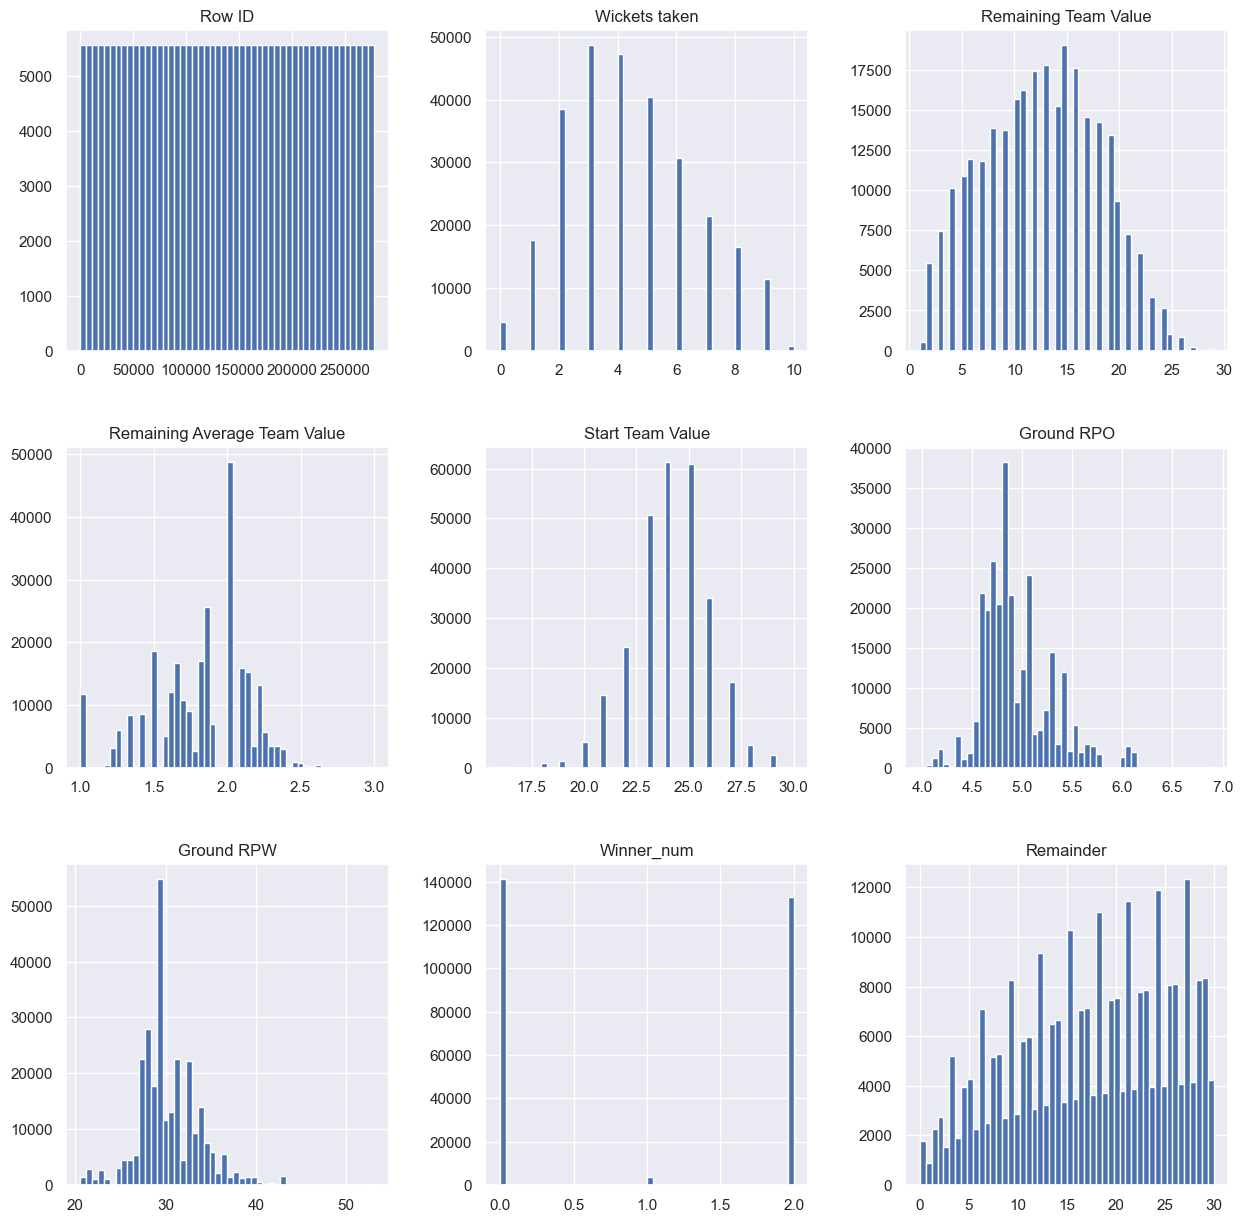

In [230]:
data_df.hist(bins=50, figsize=(15, 15))
plt.show()

Comments: Different scales, normal distribution of team value, slightly skewed of ground rpo and rpw.  Remainder funny - should I do it in balls rather than remainder?  Might make more sense.

Wickets taken and team value seem to follow Gaussian distribution and have low standard deviation (2.19 and 2.53 respectively)
Turned remaining overs and balls into remainder number and std much lower for that(7.87 compared to 47.24)

The other attributes have low standard deviation too but ground rpo, ground rpw and 

In [231]:
data_df['Winner_num'].value_counts()

Winner_num
0    141223
2    133116
1      3480
Name: count, dtype: int64

In [232]:
data_df.shape

(277819, 9)

Not using random sampling because it may end up with oversampling/ undersampling due to the imbalance of data.

In [237]:
from zlib import crc32
import numpy as np

def is_id_in_set(identifier, set_ratio, hash_function):
    return hash_function(np.int64(identifier)) < set_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, validation_ratio, id_column, random_state=None):
    np.random.seed(random_state)  # For reproducibility

    # Different hash functions for test and validation sets for indepdendence
    hash_for_test = lambda x: crc32(x) & 0xffffffff
    hash_for_validation = lambda x: crc32(x + 1) & 0xffffffff

    ids = data[id_column]

    in_test_set = ids.apply(lambda id_: is_id_in_set(id_, test_ratio, hash_for_test))
    in_validation_set = ids.apply(lambda id_: is_id_in_set(id_, validation_ratio, hash_for_validation))

    # Combine the conditions to get the training set
    in_train_set = ~in_test_set & ~in_validation_set

    return data.loc[in_train_set], data.loc[in_validation_set], data.loc[in_test_set]

train_set, validation_set, test_set = split_data_with_id_hash(data_df, test_ratio=0.1, validation_ratio=0.2, id_column='Row ID', random_state=7)


In [238]:
test_set

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remainder
23,23,3,16,2.000000,24,4.79,29.31,0,26.0
25,25,3,16,2.000000,24,4.79,29.31,0,25.4
30,30,3,16,2.000000,24,4.79,29.31,0,24.5
35,35,4,13,1.857143,24,4.79,29.31,0,24.0
36,36,4,13,1.857143,24,4.79,29.31,0,23.5
...,...,...,...,...,...,...,...,...,...
277781,277781,2,16,1.777778,21,5.40,31.64,2,8.3
277787,277787,2,16,1.777778,21,5.40,31.64,2,7.3
277793,277793,2,16,1.777778,21,5.40,31.64,2,6.3
277798,277798,2,16,1.777778,21,5.40,31.64,2,5.4


In [ ]:
train_set.shape

(198047, 9)

In [ ]:
test_set.shape

(27782, 9)

In [ ]:
validation_set.shape

(55563, 9)

In [ ]:
data_train = train_set.copy()
data_train.drop('Row ID', axis=1, inplace=True)
data_train = data_train.reset_index(drop=True)
data_train.to_csv("data_train_csv")

In [ ]:
data_test = test_set.copy()
data_test.drop('Row ID', axis=1, inplace=True)
data_test = data_test.reset_index(drop=True)
data_test.to_csv("data_test_csv")

In [ ]:
data_val = validation_set.copy()
data_val.drop('Row ID', axis=1, inplace=True)
data_val = data_val.reset_index(drop=True)
data_val.to_csv("data_val_csv")

In [ ]:
data_test

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remainder
0,3,16,2.000000,24,4.79,29.31,0,26.0
1,3,16,2.000000,24,4.79,29.31,0,25.4
2,3,16,2.000000,24,4.79,29.31,0,24.5
3,4,13,1.857143,24,4.79,29.31,0,24.0
4,4,13,1.857143,24,4.79,29.31,0,23.5
...,...,...,...,...,...,...,...,...
27777,2,16,1.777778,21,5.40,31.64,2,8.3
27778,2,16,1.777778,21,5.40,31.64,2,7.3
27779,2,16,1.777778,21,5.40,31.64,2,6.3
27780,2,16,1.777778,21,5.40,31.64,2,5.4


In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Wickets taken", "Remaining Team Value", "Remaining Average Team Value", "Start Team Value", "Ground RPO", "Ground RPW", "Winner_num"]
scatter_matrix(data_train[attributes], figsize=(25, 25))
plt.show()

KeyboardInterrupt: 

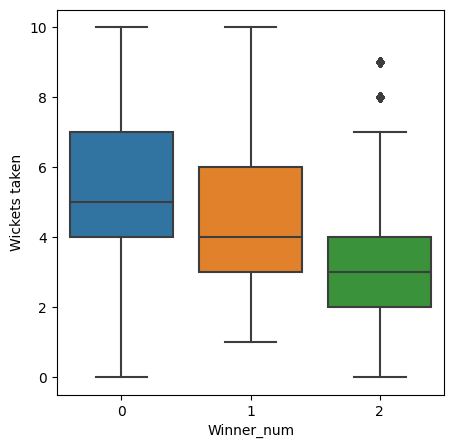

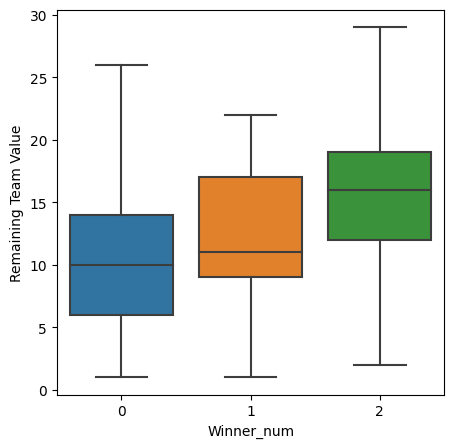

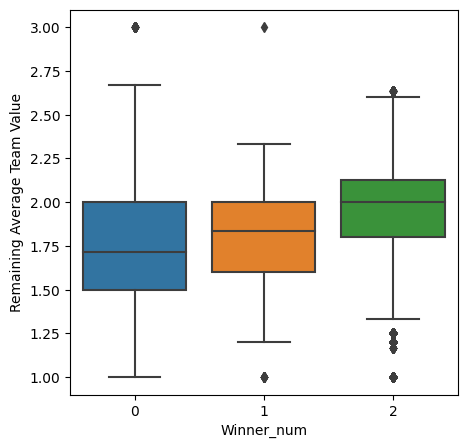

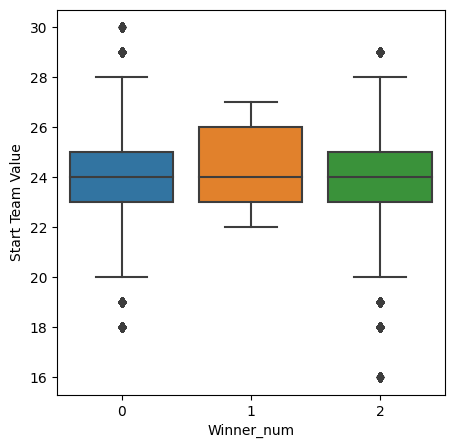

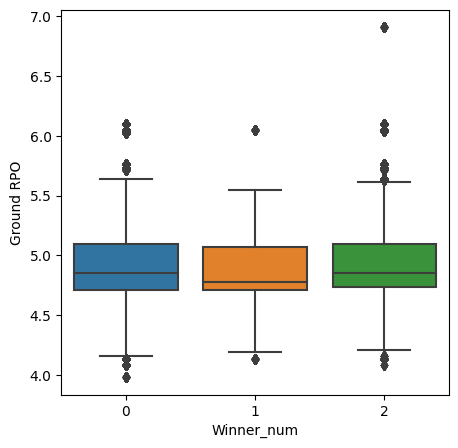

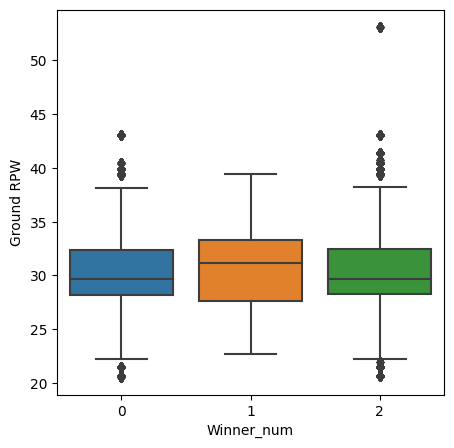

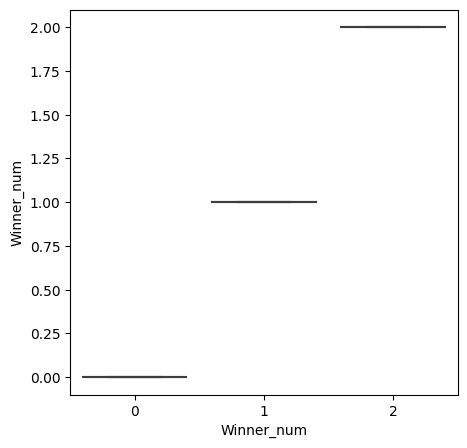

In [ ]:
for a in attributes:
    plt.figure(figsize = (5, 5))
    sns.boxplot(x='Winner_num',y=a,data=data_train)

From the boxplots you can see some near separation between wickets taken and whether team 1 or team 2 win, but a mixture for tie.

For Team Value you also see some separation between team 1 and team 2, though more overlap than for the boxplots.  Again, tie for mixture.

Aside from some outliers, Ground RPO, Ground RPW and remaining overs and balls don't seem to predict whether team 1 or team 2 wins.

<Axes: >

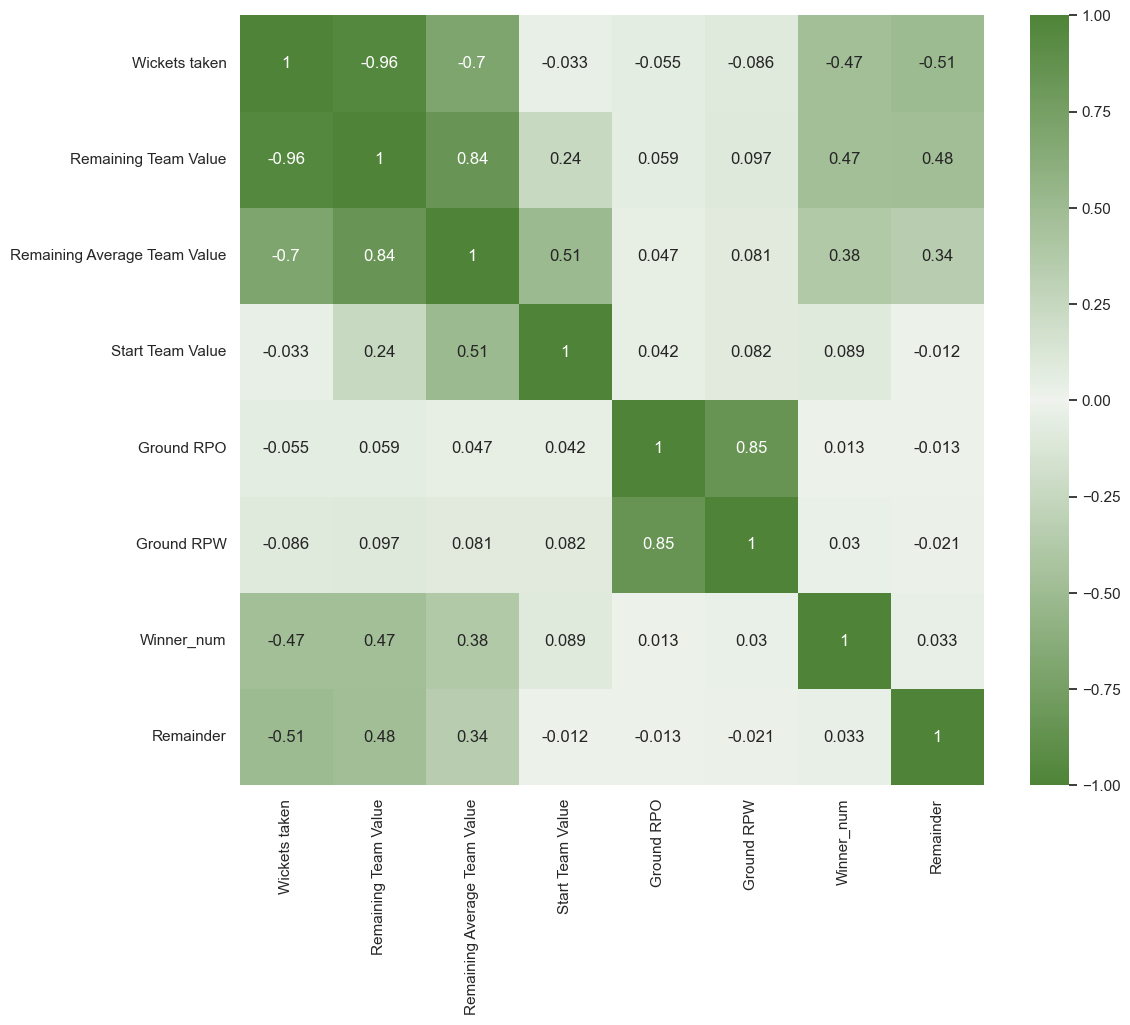

In [ ]:
corr_matrix = data_train.corr(method = 'pearson')
sns.set(rc={'figure.figsize':(12,10)})
new_cmap = sns.diverging_palette(120, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=new_cmap, vmin=-1, vmax=1)

In [ ]:
skew = data_train.skew(axis='rows')
print(skew)

Wickets taken                   0.334510
Remaining Team Value            0.021299
Remaining Average Team Value   -0.547163
Start Team Value               -0.179636
Ground RPO                      0.959065
Ground RPW                      0.556951
Winner_num                      0.056006
Remainder                      -0.267428
dtype: float64


#Commentary on correlation

Best correlation with winner are wickets taken and team value.  Unsurprisingly there's strong correlation between ground RPO and RPW.  Strong correlation betwen team value and wickets taken, which also makes sense as the more wickets taken the lower the team value.  Should I really be looking at the higher team value to start with rather than continuing team value?  Probably a better predictor but also again is that unfair?  Will run the code again and check.

Pearson or 

Data Commentary in general

Number of rows, balance of the category, skew, separability for the boxplots.

Upsampling/ oversampling to sort out imbalance

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/


In [ ]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [ ]:
X_train, X_test, X_val, y_train, y_test, y_val = data_format(data_train, data_test, data_val, None, None)

In [ ]:
X_train

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remainder
0,3,16,2.000,24,4.79,29.31,29.5
1,3,16,2.000,24,4.79,29.31,29.3
2,3,16,2.000,24,4.79,29.31,29.2
3,3,16,2.000,24,4.79,29.31,29.0
4,3,16,2.000,24,4.79,29.31,28.5
...,...,...,...,...,...,...,...
198042,3,13,1.625,21,5.40,31.64,3.1
198043,3,13,1.625,21,5.40,31.64,3.0
198044,3,13,1.625,21,5.40,31.64,2.5
198045,3,13,1.625,21,5.40,31.64,2.4


In [ ]:
#x+2 if there are some 0 and -1 values
#x+1 if not
def logtransform(trainx):
    xlogtransform = trainx[['Wickets taken', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder']].apply(lambda x: np.log(x+2))
    xlogtransform.reset_index(drop=True)
    xlogtransform.insert(loc=1, column='Remaining Team Value', value=trainx['Remaining Team Value'])
        
    #ylogtransform = trainy[['Winner_num']].apply(lambda x: np.log(x+2))
    
    return (xlogtransform)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def mm(trainx, testx, valx):
    
    #MinMaxScaler - Normalisation is rescaling the data so that all values are within the range of 0 and 1
    X_scaler = MinMaxScaler(feature_range=(0,1))
    X_scaler.fit(trainx)
    trainx_norm = X_scaler.transform(trainx)
    testx_norm = X_scaler.transform(testx)
    valx_norm = X_scaler.transform(valx)

    trainx_norm = pd.DataFrame(trainx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])
    testx_norm = pd.DataFrame(testx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])
    valx_norm = pd.DataFrame(valx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])

    return(trainx_norm, testx_norm, valx_norm)

Data Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
def ss(trainx, testx, valx):
    scaler = StandardScaler()
    scaler.fit(trainx)
    trainx = scaler.transform(trainx)
    testx = scaler.transform(testx)
    valx = scaler.transform(valx)

    trainx = pd.DataFrame(trainx, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])
    testx = pd.DataFrame(testx, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])
    valx = pd.DataFrame(valx, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])

    return (trainx, testx, valx)

In [ ]:
#https://arxiv.org/abs/1106.1813
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ should I print a diagram of the distribution before and after?
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9299283/

from imblearn.over_sampling import SMOTE

def imbalance(trainx, trainy, strategy):
    if strategy == 'auto':
        smote = SMOTE(sampling_strategy='auto', random_state=7)

    elif strategy == 'minority':
        smote = SMOTE(sampling_strategy='minority', random_state=7)
    trainx_smote, trainy_smote = smote.fit_resample(X_train, y_train)
    
    return(trainx_smote, trainy_smote)

In [ ]:
def process(trainx, testx, valx, trainy, testy, valy):

    data_train_df = trainx.copy()
    data_train_df['Winner_num']= trainy

    data_test_df = testx.copy()
    data_test_df['Winner_num']= testy
    
    data_val_df = valx.copy()
    data_val_df['Winner_num']= valy

    return (data_train_df, data_test_df, data_val_df)    

In [ ]:
y_val.shape

(55563,)

In [ ]:
#SMOTE min only
X_smin_train, y_smin_train = imbalance(X_train, y_train, 'minority')
data_smin_train_df, data_smin_test_df, data_smin_val_df = process(X_smin_train, X_test, X_val, y_smin_train, y_test, y_val)

In [ ]:
#SMOTE auto only
X_smauto_train, y_smauto_train = imbalance(X_train, y_train, 'auto')
data_smauto_train_df, data_smauto_test_df, data_smauto_val_df = process(X_smauto_train, X_test, X_val, y_smauto_train, y_test, y_val)

In [ ]:
#SMOTE min and MinMax
X_mm_train, X_mm_test, X_mm_val = mm(X_smin_train, X_test, X_val)
data_smin_mm_train_df, data_mm_test_df, data_mm_val_df = process(X_mm_train, X_mm_test, X_mm_val, y_smin_train, y_test, y_val)

In [ ]:
#SMOTE min and SS
X_ss_train, X_ss_test, X_ss_val = ss(X_smin_train, X_test, X_val)
data_smin_ss_train_df, data_ss_test_df, data_ss_val_df = process(X_ss_train, X_ss_test, X_ss_val, y_smin_train, y_test, y_val)

In [ ]:
#SMOTE and logtransform

X_log_train = logtransform(X_smin_train)
data_smin_log_train_df, data_test_df, data_val_df = process(X_log_train, X_test, X_val, y_smin_train, y_test, y_val)

In [ ]:
#Smote min only
data_smin_train_df.to_csv('data_smin_train_csv')
data_test_df.to_csv('data_test_csv')
data_val_df.to_csv('data_val_csv')

In [ ]:
#Smote auto only
data_smauto_train_df.to_csv('data_smauto_train_csv')
#Use the data_test and data_val set as SMOTE doesn't affect the test or val set

In [ ]:
##Smote min and minmax
data_smin_mm_train_df.to_csv('data_smin_mm_train_csv')
data_mm_test_df.to_csv('data_mm_test_csv')
data_mm_val_df.to_csv('data_mm_val_csv')

In [ ]:
##Smote and ss
data_smin_ss_train_df.to_csv('data_smin_ss_train_csv')
data_ss_test_df.to_csv('data_ss_test_csv')
data_ss_val_df.to_csv('data_ss_val_csv')

In [ ]:
##Smote and log
data_smin_log_train_df.to_csv('data_smin_log_train_csv')
data_test_df.to_csv('data_test_csv')
data_val_df.to_csv('data_val_csv')

In [ ]:
print(data_smin_train_df.shape)
print(data_smauto_train_df.shape)
print(data_smin_train_df.shape)

(296133, 8)
(301677, 8)
(296133, 8)


In [ ]:
data_smin_ss_train_df

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remainder,Winner_num
0,-0.658987,0.660202,0.594028,-0.144993,-0.364695,-0.290219,1.589765,0
1,-0.658987,0.660202,0.594028,-0.144993,-0.364695,-0.290219,1.565495,0
2,-0.658987,0.660202,0.594028,-0.144993,-0.364695,-0.290219,1.553359,0
3,-0.658987,0.660202,0.594028,-0.144993,-0.364695,-0.290219,1.529089,0
4,-0.658987,0.660202,0.594028,-0.144993,-0.364695,-0.290219,1.468412,0
...,...,...,...,...,...,...,...,...
296128,0.757848,-0.647129,-0.047408,1.529208,0.302367,0.916292,1.188296,1
296129,0.285570,-0.647129,-1.009560,-0.144993,2.997299,2.460516,-1.109792,1
296130,-0.658987,0.286679,-0.207766,-0.703059,-0.444743,0.210905,1.353352,1
296131,-1.131266,1.220486,0.950380,-0.144993,0.382415,0.292610,-0.986604,1


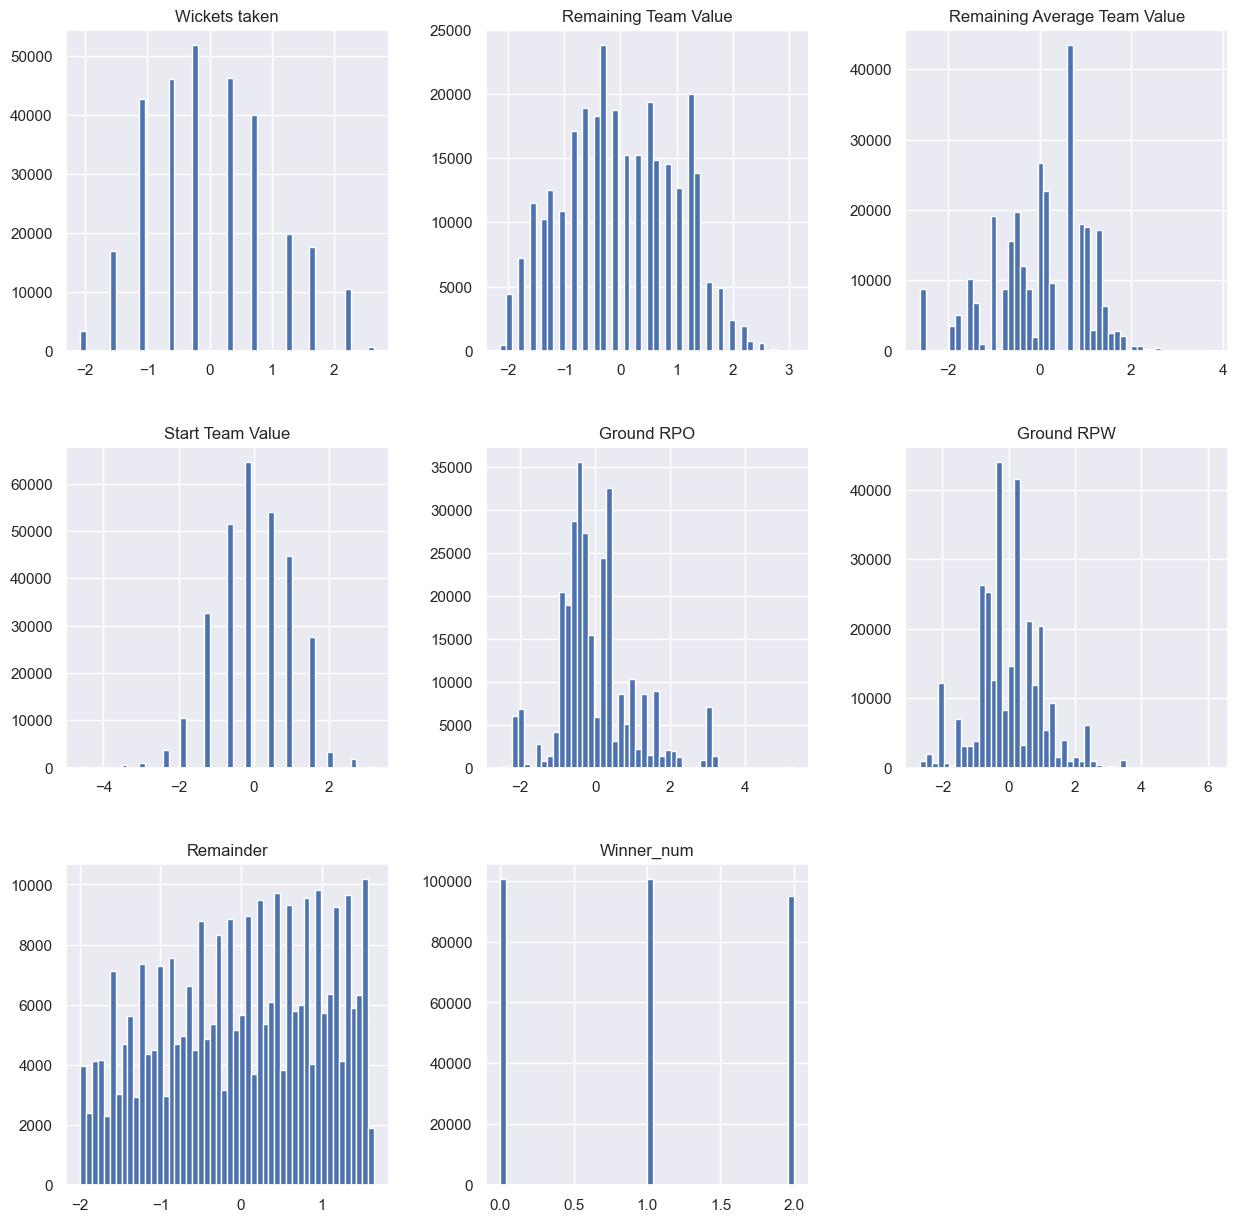

In [ ]:
data_smin_ss_train_df.hist(bins=50, figsize=(15, 15))
plt.show()

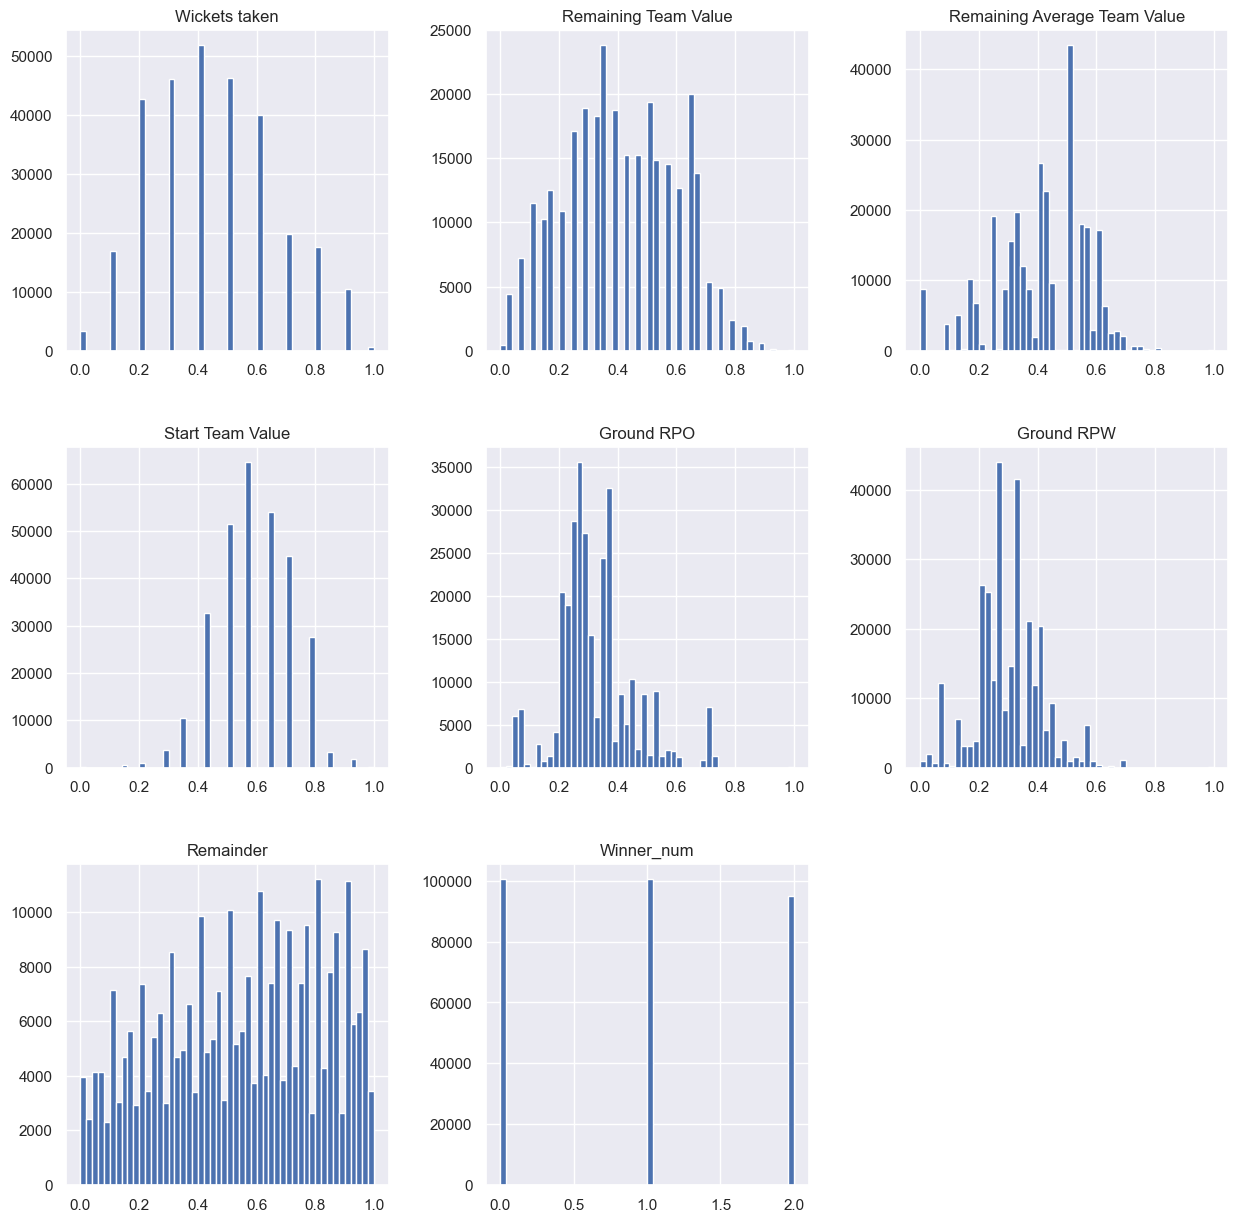

In [ ]:
data_smin_mm_train_df.hist(bins=50, figsize=(15, 15))
plt.show()

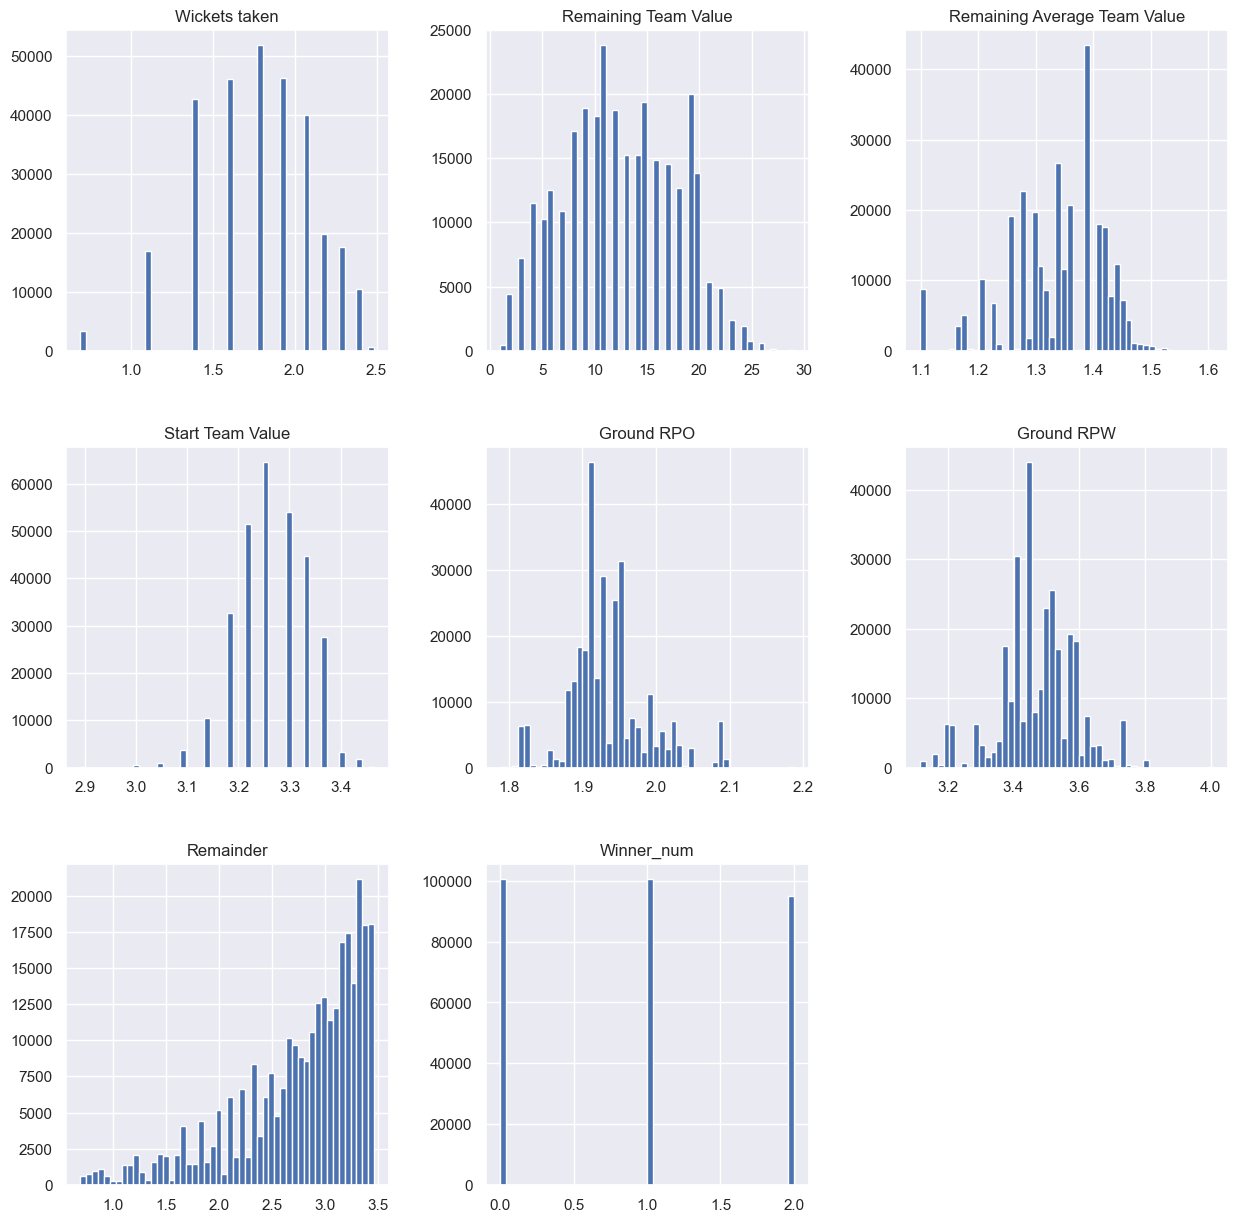

In [ ]:
data_smin_log_train_df.hist(bins=50, figsize=(15, 15))
plt.show()

In [ ]:
data_smin_log_train_df

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remainder,Winner_num
0,1.609438,16,1.386294,3.258097,1.915451,3.443938,3.449988,0
1,1.609438,16,1.386294,3.258097,1.915451,3.443938,3.443618,0
2,1.609438,16,1.386294,3.258097,1.915451,3.443938,3.440418,0
3,1.609438,16,1.386294,3.258097,1.915451,3.443938,3.433987,0
4,1.609438,16,1.386294,3.258097,1.915451,3.443938,3.417727,0
...,...,...,...,...,...,...,...,...
296128,2.079442,9,1.335001,3.367296,1.951608,3.576271,3.339029,1
296129,1.945910,9,1.252763,3.258097,2.085672,3.723522,2.225116,1
296130,1.609438,14,1.321756,3.218876,1.911023,3.501043,3.386147,1
296131,1.386294,19,1.413693,3.258097,1.955860,3.510052,2.329195,1


https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#:~:text=In%20a%20dataset%20with%20highly,obviously%20not%20the%20correct%20one.

Questions:
Should I change the 0s to 3s or similar for Winner_num so that I don't have to add things to them to do the lognorm etc.